# CS 109A/AC 209A/STAT 121A Data Science: Lab 1 (Solutions)
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Tuesday, September 13th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW1.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid running your notebook on Vocareum and avoid changing your file after submitting.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [4]:
#For problem set statement
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#For solution ONLY
import matplotlib.cm as cmx
import matplotlib.colors as colors

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last, First]

### Part (b): Course Number

[CS 109a or STATS 121a or AC 209a]

---

## Problem 1: Basic Data Visualization, Manipulation and Analysis

In this problem, we will be using some basic tools of data visualization and statistical analysis to help build our intuition for finding, describing and interpreting patterns in data. We will be working with the data contained in the file `dataset_HW1.txt`. The data in `dataset_HW1.txt` contains biometric readings for a number of diabetic patients. In this problem, we will try to detect disease subtypes within this set of patients using their biometric readings.

### Part (a): Understanding a Pandas Dataframe
Load the data from `dataset_HW1.txt` into a pandas dataframe. Get a basic picture of the information contained in the dataframe by printing the head, the size of the dataframe, the range of values in numeric-valued columns. Store the max, min and range information as a pandas dataframe.

<b>Solution:</b>

**Coding tip:** Breaking up a large chunck of code into smaller pieces and putting each piece into it's own code cell  will make debugging and visualization easier.

In [5]:
### Since I'm visualizing a dataframe I want to put this code and it's output 
### in it's own cell.

#read data into pandas df
df = pd.read_csv('dataset_HW1.txt')

#size of data frame
print 'number of patients:', df.shape[0]

#print first 5 rows of dataframe
df.head(n=5)

number of patients: 2300


,patient_id,marker_1,marker_2,subtype,patient_age,patient_gender
0,619681,21.640523,144.001572,0,3,female
1,619711,13.787380,162.408932,0,15,female
2,619595,22.675580,130.227221,0,6,female
3,619990,13.500884,138.486428,0,17,male
4,619157,2.967811,144.105985,0,6,female


In [7]:
### Since I'm visualizing another data frame with stats I want to put the 
### code as well as the output in its own cell

#choose columns 1, 2, 3, 4 (ignoring columns 0 and 4)
df_cols_1_to_4 = df[range(1, 5)] 

#get column names from important_column dataframe
column_names = df_cols_1_to_4.columns.values 

#create pandas dataframe with column names given by column_names
stats = pd.DataFrame(columns=column_names)

#create a row called 'max' and store max values from the columns of important_columns
stats.loc['max'] = df_cols_1_to_4.max()

#create a row called 'min' and store min values from the columns of important_columns
stats.loc['min'] = df_cols_1_to_4.min()

#create a row called 'range' and store range of values from the columns of important_columns
stats.loc['range'] = df_cols_1_to_4.max() - df_cols_1_to_4.min()
stats.head(n=5)

,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3,90
min,-22.591722,-56.388949,0,3
range,102.801470,420.610725,3,87


### Part (b): Descriptive Statistics
Find the mean, median and standard deviation of the real-valued columns in the entire dataset. Now find the same set of descriptive statistics for each of the following subset of data:

1. children (ages 3 - 17)
2. adult males (ages 18 - 90)
3. adult females (ages 18 - 90)

Append these stats to the dataframe from part (a), containing the max, min and range. Explain what these stats say about the entire dataset as well as each of the above subsets.

Give a summary of the demographics of the patients contained in the dataset, i.e. how many children, how many adults, how many adult females and how many adult males. Display these results as pie charts.

**Solution:**

In [25]:
### Since I'm visualizing appending new stats to my dataframe with range, min and max
### I want to put the code as well as the output in its own cell

#choose columns 1, 2, 4 (ignoring columns 0, 3 and 4)
df_cols_1_2_4 = df[[1, 2, 4]] 

stats.loc['mean'] = df_cols_1_2_4.mean()
stats.loc['median'] = df_cols_1_2_4.median()
stats.loc['std'] = df_cols_1_2_4.std()
stats

whole dataset:


,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3,90.000000
min,-22.591722,-56.388949,0,3.000000
range,102.801470,420.610725,3,87.000000
mean,31.970053,105.974247,NaN,38.868261
median,33.743705,105.179291,NaN,35.000000
std,18.096490,52.306201,NaN,27.211950


In [23]:
### New task new cell

#Create three different datasets by filtering our entire set
children_data = df[df['patient_age'] < 18]
adult_women_data = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')]
adult_male_data = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')]
    
#create dataframe with select column names (just like before)
column_names = children_data[range(1, 5)].columns.values
child_stats = pd.DataFrame(columns=column_names)

#add a row for each stat (just like before)
child_stats.loc['child_max'] = children_data[range(1, 5)].max()
child_stats.loc['child_min'] = children_data[range(1, 5)].min()
child_stats.loc['child_range'] = children_data[range(1, 5)].max() - children_data[range(1, 5)].min()

child_stats.loc['child_mean'] = children_data[[1, 2, 4]].mean()
child_stats.loc['child_median'] = children_data[[1, 2, 4]].median()
child_stats.loc['child_std'] = children_data[[1, 2, 4]].std()

child_stats

,marker_1,marker_2,subtype,patient_age
max,80.209748,171.429357,3,17.000000
min,-22.591722,70.538569,0,3.000000
range,102.801470,100.890788,3,14.000000
mean,26.267379,121.396907,NaN,10.106250
median,26.868357,121.799063,NaN,10.000000
std,24.972128,23.658433,NaN,4.307337


In [26]:
### New task new cell

#create dataframe with select column names (just like before)
column_names = adult_women_data[range(1, 5)].columns.values
adult_women_stats = pd.DataFrame(columns=column_names)

#add a row for each stat (just like before)
adult_women_stats.loc['adult_f_max'] = adult_women_data[range(1, 5)].max()
adult_women_stats.loc['adult_f_min'] = adult_women_data[range(1, 5)].min()
adult_women_stats.loc['adult_f_range'] = adult_women_data[range(1, 5)].max() - adult_women_data[range(1, 5)].min()

adult_women_stats.loc['adult_f_mean'] = adult_women_data[[1, 2, 4]].mean()
adult_women_stats.loc['adult_f_median'] = adult_women_data[[1, 2, 4]].median()
adult_women_stats.loc['adult_f_std'] = adult_women_data[[1, 2, 4]].std()
adult_women_stats

,marker_1,marker_2,subtype,patient_age
adult_f_max,59.702106,190.047718,1,90.000000
adult_f_min,28.364561,-43.386768,0,18.000000
adult_f_range,31.337545,233.434486,1,72.000000
adult_f_mean,44.053269,74.006378,NaN,54.613750
adult_f_median,43.911490,73.086403,NaN,56.000000
adult_f_std,7.141580,53.320292,NaN,21.094034


In [28]:
### New task new cell

#create dataframe with select column names (just like before)
column_names = adult_male_data[range(1, 5)].columns.values
adult_male_stats = pd.DataFrame(columns=column_names)

#add a row for each stat (just like before)
adult_male_stats.loc['adult_m_max'] = adult_male_data[range(1, 5)].max()
adult_male_stats.loc['adult_m_min'] = adult_male_data[range(1, 5)].min()
adult_male_stats.loc['adult_m_range'] = adult_male_data[range(1, 5)].max() - adult_male_data[range(1, 5)].min()

adult_male_stats.loc['adult_m_mean'] = adult_male_data[[1, 2, 4]].mean()
adult_male_stats.loc['adult_m_median'] = adult_male_data[[1, 2, 4]].median()
adult_male_stats.loc['adult_m_std'] = adult_male_data[[1, 2, 4]].std()
adult_male_stats

,marker_1,marker_2,subtype,patient_age
adult_m_max,40.458624,364.221777,2,90.000000
adult_m_min,1.860516,-56.388949,0,18.000000
adult_m_range,38.598108,420.610725,2,72.000000
adult_m_mean,24.678005,124.883059,NaN,53.744286
adult_m_median,26.168875,110.893774,NaN,54.000000
adult_m_std,6.956745,57.523807,NaN,21.295497


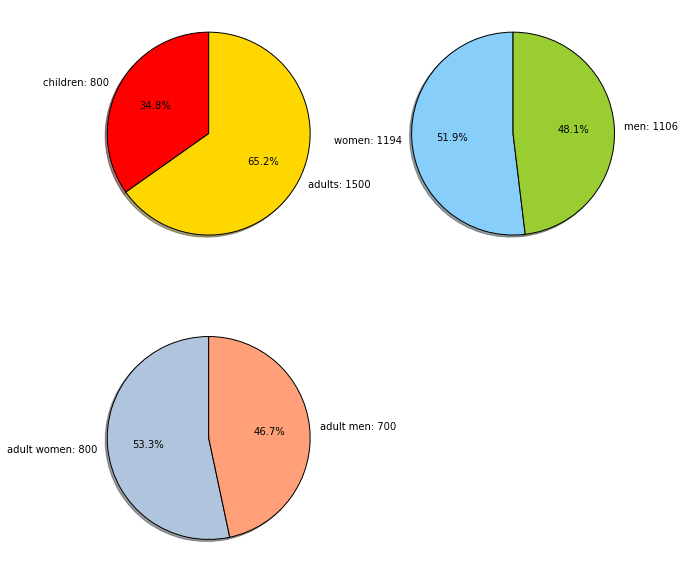

In [30]:
#children vs adults pie chart
children = children_data.shape[0] #number of kids
adults = df.shape[0] - children #adults = total number - kids

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(221)
ax1.pie([children, adults], 
        labels=['children: ' + str(children), 'adults: ' + str(adults)], 
        colors=['red', 'gold'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#women vs men pie chart
women = df[df['patient_gender'] == 'female'].shape[0] #number of women
men = df.shape[0] - women #men = total number - women

ax2 = fig.add_subplot(222)
ax2.pie([women, men], 
        labels=['women: ' + str(women), 'men: ' + str(men)], 
        colors=['lightskyblue', 'yellowgreen'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#adult women vs men pie chart
adult_women = adult_women_data.shape[0]
adult_men = adults - adult_women

ax3 = fig.add_subplot(223)
ax3.pie([adult_women, adult_men], 
        labels=['adult women: ' + str(adult_women), 'adult men: ' + str(adult_men)], 
        colors=['lightsteelblue', 'lightsalmon'],
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

### Part (c): Data Visualization
To understand how the biometric reading might help us determine diabetic subtypes, we begin with some visual analysis of the biometric data:

1. plot histograms of marker 1 and marker 2 (play with different values for the bin number to find the most usefule visualization)
2. plot both markers in a scatter plot, color each point according to disease subtype

Do the above for each demographics within the data: children, adult men and adult women.

**Solution:**

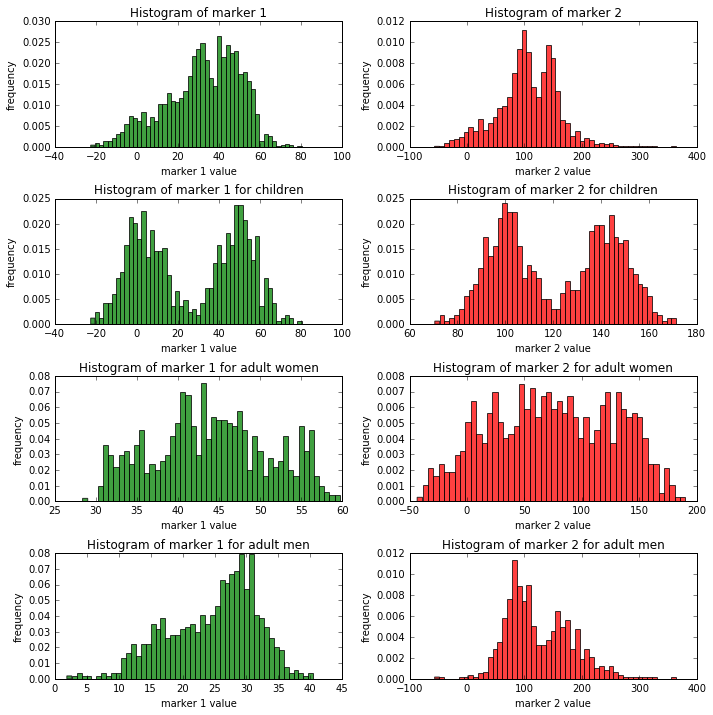

In [35]:
#function for plotting histograms
def plot_hist(data, title, x_label, face, axes):
    
    axes.hist(data, 
         50, 
         normed=1, 
         facecolor=face, 
         alpha=0.75)
    
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel('frequency')
    
    return axes
    
#plot histograms for each marker and each demographics
#in the following, instead of adding one subplot to a 4x2 grid at a time
#I can get all the subplot axes for the grid in one line 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(10, 10))
ax1 = plot_hist(df['marker_1'],
                'Histogram of marker 1', 
                'marker 1 value', 
                'green', 
                ax1)

ax2 = plot_hist(df['marker_2'],
                'Histogram of marker 2', 
                'marker 2 value', 
                'red', 
                ax2)

ax3 = plot_hist(children_data['marker_1'],
                'Histogram of marker 1 for children', 
                'marker 1 value', 
                'green', 
                ax3)

ax4 = plot_hist(children_data['marker_2'],
                'Histogram of marker 2 for children', 
                'marker 2 value', 
                'red', 
                ax4)

ax5 = plot_hist(adult_women_data['marker_1'],
                'Histogram of marker 1 for adult women', 
                'marker 1 value', 
                'green', 
                ax5)

ax6 = plot_hist(adult_women_data['marker_2'],
                'Histogram of marker 2 for adult women', 
                'marker 2 value', 
                'red', 
                ax6)

ax7 = plot_hist(adult_male_data['marker_1'],
                'Histogram of marker 1 for adult men', 
                'marker 1 value', 
                'green', 
                ax7)

ax8 = plot_hist(adult_male_data['marker_2'],
                'Histogram of marker 2 for adult men', 
                'marker 2 value', 
                'red', 
                ax8)

plt.tight_layout()
plt.show()

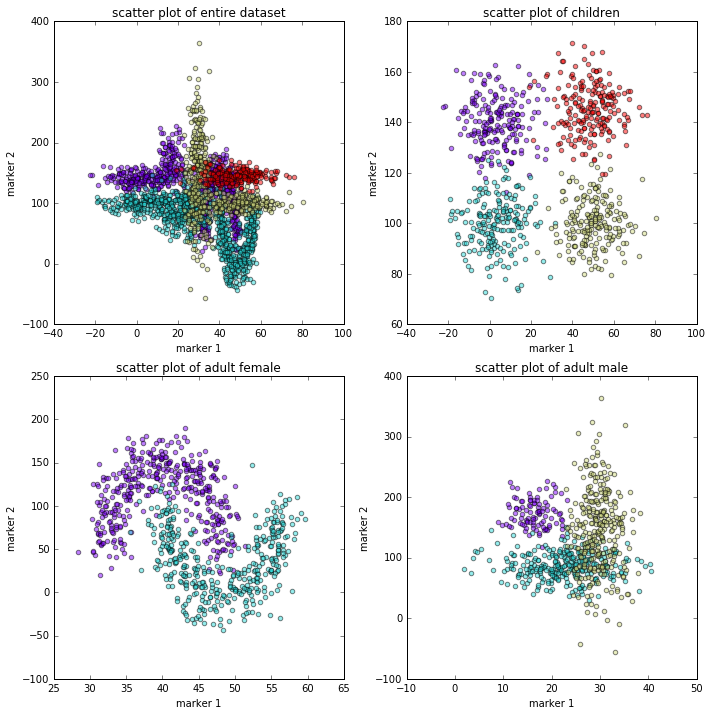

In [34]:
def plot_scatter(data, plot_title, x_lable, y_lable, groups, axes):
    #set up color map (one color per group number)
    
    #split [0, 1] in to as many parts as there are groups
    group_numbers = np.linspace(0, 1, groups) 
    #get a color map
    c_map = plt.get_cmap('rainbow') 
    #get a range of colors from color map
    c_norm  = colors.Normalize(vmin=0, vmax=group_numbers[-1])
    #get a map that maps a group number to a color
    number_map = cmx.ScalarMappable(norm=c_norm, cmap=c_map)
    
    #plot points colored by their group number
    for group in xrange(groups):
        #convert a group number into a color using our map
        color = number_map.to_rgba(group_numbers[group])
        #make a scatter plot of a specific group colored by its group number color
        axes.scatter(data[data['subtype'] == group]['marker_1'], 
                     data[data['subtype'] == group]['marker_2'], 
                     c=color, 
                     alpha = 0.5)

    axes.set_title(plot_title) 
    axes.set_xlabel(x_lable)
    axes.set_ylabel(y_lable)
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

plot_scatter(df, 'scatter plot of entire dataset', 'marker 1', 'marker 2', 4, ax1)  
plot_scatter(children_data, 
             'scatter plot of children', 
             'marker 1', 'marker 2', 
             4,
             ax2)  
plot_scatter(adult_women_data, 
             'scatter plot of adult female', 
             'marker 1', 
             'marker 2', 
             4, 
             ax3)  
plot_scatter(adult_male_data, 
             'scatter plot of adult male', 
             'marker 1', 
             'marker 2', 
             4, 
             ax4) 

plt.tight_layout()
plt.show()

### Part (d): Putting it All Together

Summarize and interpret the patterns in the **histograms** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric data (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Summarize and interpret the patterns in the **scatter plots** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric readings (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Do your analyses of the patterns in histograms and the scatter plots support or contradict each other? Is one of the two visualizations more useful than the other for anlyzing the relationship between biometric data and disease subtypes? If so which, and why?

Compare the descriptive stats you computed in part (b) with the visualizations. Which aspects of the visualizations (histogram and scatter plots) does each statistic measure? 

Do the stats support, contradict or enhance your visual analysis of the biometric data? 

Finally, what can you conclude, based on your visual analysis and stats, about the relationship between biometric data and diabetic subtypes in this pool of patients?

**Solution:**

[Fill out and expand on the following outline in your own words]

1. **Histograms**
    a. in the histograms of (both Marker 1 and Marker 2) for the entire data set, it looks like there might be multiple modes, but it's not entirely clear that this is not due to noise.
    b. in the histograms of (both Marker 1 and Marker 2) for children, it is very clear that the distribution for Marker 1 and Marker 2 are bimodal. That is the children dataset falls into two distinct groups based on their Marker 1 biometric and two distinct groups based on their Marker 2 biometric. **Note:** It's not clear if the subgrouping by the two markers are the same or different! 
    c. in the histograms of (both Marker 1 and Marker 2) for adult women, the distributions looks unimodal
    d. in the histogram of Marker 1 for adult men, the distribution looks unimodal; the histogram of Marker 2 for adult men looks bimodal

2. **Scatter Plots**
    a. It appears that while the over all dataset has four disease subtypes, all four are present only in children. There are only two subtypes present for adult women and three for adult men.
    b. In the scatter plot (color code by disease subtype) for the entire dataset, there doesn't seem to be clear separation between the data points in the different subtypes.
    c. In the scatter plot for the children dataset, the points in the different subtypes are well separated. Points for each subtypes form spherical clusters and are concentrated around a "center".
    d. In the scatter plot for the adult female dataset, the points in the different subtypes form clusters, the clusters are separated, but are in crescent shapes.
    e. In the scatter plot for the adult male dataset, the points in the different subtypes form clusters. Two of the clusters overlap.
    
3. **Comparison of Visualizations and Stats**
    a. The modes in the histogram correspond to clustering of the biometric data by disease subtype. 
    b. Using the histogram alone, we cannot necessarily deduce the distribution of the scatter plots.
    c. Using the histograms alone, we cannot deduce clustering by disease subtypes. The modes in the histogram tell us where the data is concentrated along which axis, but they cannot tell us which disease subtypes exist in each mode.
    d. The stats we calculated for the entire dataset also give no indication of the patterns we see in the scatter plots.

4. **Conclusion**
    a. if we looked at the data one demographic group at a time, then, for all demographic groups, it looks like biometric data cluster by disease type.
    b. the clusters are well separated for children, the separation is along both the Marker 1 and Marker 2 axes. The separation is not so clear for the other two groups.

---